In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from model_GD import LogisticRegression

/home/hoon/anaconda3/envs/ml-from-scratch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)


In [3]:
print(x_train.shape)

(455, 30)


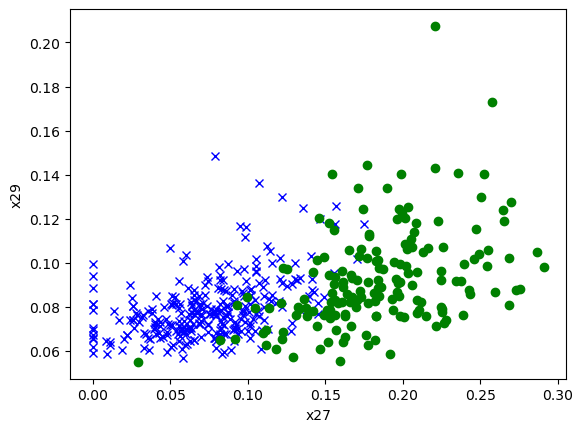

In [4]:
plt.xlabel('x27')
plt.ylabel('x29')
plt.plot(x_train[y_train == 1, 27], x_train[y_train == 1, 29], 'bx', linewidth=2)
plt.plot(x_train[y_train == 0, 27], x_train[y_train == 0, 29], 'go', linewidth=2)

In [5]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test) / len(y_test)

In [6]:
model = LogisticRegression(lr=10, eps=0.01)
model.fit(x_train, y_train)
class_pred = model.predict(x_test)
theta = model.theta

[1.41360322e+02 1.75311013e+02 9.34517486e+02 7.92343498e+03
 8.39710790e-01 1.19444550e+00 1.32955645e+00 7.19139026e-01
 1.56479885e+00 5.10450704e-01 4.91246585e+00 9.93052053e+00
 3.50826622e+01 5.83904246e+02 5.58506225e-02 2.67229370e-01
 3.46204619e-01 1.22714469e-01 1.62144847e-01 3.39320447e-02
 1.71205978e+02 2.38815423e+02 1.14835304e+03 1.15404455e+04
 1.18912252e+00 3.10194678e+00 3.76388764e+00 1.49113652e+00
 2.61287329e+00 7.52116790e-01]


0.6052631578947368
[1.41360322e+02 1.75311013e+02 9.34517486e+02 7.92343498e+03
 8.39710790e-01 1.19444550e+00 1.32955645e+00 7.19139026e-01
 1.56479885e+00 5.10450704e-01 4.91246585e+00 9.93052053e+00
 3.50826622e+01 5.83904246e+02 5.58506225e-02 2.67229370e-01
 3.46204619e-01 1.22714469e-01 1.62144847e-01 3.39320447e-02
 1.71205978e+02 2.38815423e+02 1.14835304e+03 1.15404455e+04
 1.18912252e+00 3.10194678e+00 3.76388764e+00 1.49113652e+00
 2.61287329e+00 7.52116790e-01]


(0.024548, 0.23799199999999998)

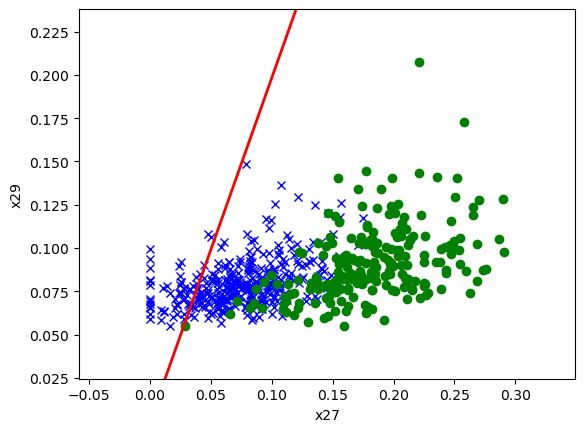

In [7]:
acc = accuracy(class_pred, y_test)
print(acc)
print(theta)
# Plot dataset
plt.figure()
plt.xlabel('x27')
plt.ylabel('x29')
plt.plot(x[y == 1, 27], x[y == 1, 29], 'bx', linewidth=2)
plt.plot(x[y == 0, 27], x[y == 0, 29], 'go', linewidth=2)

# Plot decision boundary (found by solving for theta^T x = 0)
margin27 = (max(x[:, 27]) - min(x[:, 27]))*0.2
margin29 = (max(x[:, 29]) - min(x[:, 29]))*0.2
x1 = np.arange(min(x[:, 27])-margin27, max(x[:, 27])+margin27, 0.01)
# x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
x2 = (theta[27] / theta[29]) * x1
plt.plot(x1, x2, c='red', linewidth=2)
plt.xlim(x[:, 27].min()-margin27, x[:, 27].max()+margin27)
plt.ylim(x[:, 29].min()-margin29, x[:, 29].max()+margin29)

# Add labels and save to disk
# plt.xlabel('x1')
# plt.ylabel('x2')
# if save_path is not None:
#     plt.savefig(save_path)